# **<center>STOCK PRICE PREDICTION Using Regression and Deep Learning Algorithms</center>**

**Discussed Algorithms:**
  1. Support Vector Regressor
  2. Random Forest Regressor
  3. KNN Regressor
  4. LSTM (Long Short-Term Memory)
  5. GRU (Gated Recurrent Unit)


In [1]:
import pandas as pd
import numpy as np

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import warnings
warnings.filterwarnings('ignore')

**Data Ingestion**

In [2]:
df = yf.download("RELIANCE.NS", start="2020-01-01", end="2023-02-12")
df = df.round(2)

[*********************100%***********************]  1 of 1 completed


**Top 5 rows of dataframe**

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1503.75,1512.76,1491.36,1495.42,1480.60,6463060
2020-01-02,1497.80,1526.48,1497.80,1520.88,1505.80,8173308
2020-01-03,1518.61,1527.17,1508.70,1522.72,1507.62,9684434
2020-01-06,1505.73,1513.55,1483.93,1487.40,1472.65,11315596
2020-01-07,1504.74,1520.09,1499.29,1510.28,1495.31,7699489


**Bottom 5 rows of dataframe**

In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-06,2315.00,2321.00,2305.8,2311.45,2311.45,6847679
2023-02-07,2312.00,2327.40,2293.0,2305.90,2305.90,6985001
2023-02-08,2313.00,2359.90,2307.0,2351.95,2351.95,9765490
2023-02-09,2353.45,2370.85,2334.0,2356.05,2356.05,6079228
2023-02-10,2354.90,2354.90,2321.3,2336.65,2336.65,4979789


**Shape of the dataframe**

In [5]:
df.shape

(776, 6)

**List of columns in the dataframe**

In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

**Checking duplicate**

In [7]:
df.duplicated().sum()

0

**Checking Null**

In [8]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Basic information about  the dataframe**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 776 entries, 2020-01-01 to 2023-02-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       776 non-null    float64
 1   High       776 non-null    float64
 2   Low        776 non-null    float64
 3   Close      776 non-null    float64
 4   Adj Close  776 non-null    float64
 5   Volume     776 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 42.4 KB


**Basic statistics of the dataframe**

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,776.000000,776.000000,776.000000,776.000000,776.000000,7.760000e+02
mean,2167.094845,2192.276559,2140.237345,2165.052680,2156.220142,1.072168e+07
std,411.323219,411.588851,410.701226,411.424699,414.557967,8.647033e+06
min,907.600000,941.080000,867.430000,875.750000,867.060000,7.871600e+05
25%,1971.575000,1992.987500,1945.200000,1969.062500,1956.857500,5.315051e+06
50%,2226.050000,2248.325000,2201.600000,2225.450000,2212.525000,7.899472e+06
75%,2497.162500,2520.675000,2465.262500,2495.137500,2491.650000,1.293660e+07
max,2856.150000,2856.150000,2786.100000,2819.850000,2811.390000,6.584835e+07


**Checking unique values in each column and making Date as index to perform our analysis**

In [11]:
df.nunique()

Open         698
High         728
Low          731
Close        759
Adj Close    763
Volume       776
dtype: int64

In [12]:
df['Date'] = df.index

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-01-01,1503.75,1512.76,1491.36,1495.42,1480.60,6463060,2020-01-01
2020-01-02,1497.80,1526.48,1497.80,1520.88,1505.80,8173308,2020-01-02
2020-01-03,1518.61,1527.17,1508.70,1522.72,1507.62,9684434,2020-01-03
2020-01-06,1505.73,1513.55,1483.93,1487.40,1472.65,11315596,2020-01-06
2020-01-07,1504.74,1520.09,1499.29,1510.28,1495.31,7699489,2020-01-07
...,...,...,...,...,...,...,...
2023-02-06,2315.00,2321.00,2305.80,2311.45,2311.45,6847679,2023-02-06
2023-02-07,2312.00,2327.40,2293.00,2305.90,2305.90,6985001,2023-02-07
2023-02-08,2313.00,2359.90,2307.00,2351.95,2351.95,9765490,2023-02-08


**Cheking range of date**

In [14]:
print("Starting date: ",df.iloc[0][-1])
print("Ending date: ", df.iloc[-1][-1])
print("Duration: ", df.iloc[-1][-1]-df.iloc[0][-1])

Starting date:  2020-01-01 00:00:00
Ending date:  2023-02-10 00:00:00
Duration:  1136 days 00:00:00


In [15]:
daywise= df.groupby(df['Date'].dt.strftime('%d'))[['Open','Close']].mean().sort_values(by='Close')
daywise

,Open,Close
Date,,
03,2098.517037,2094.773333
26,2120.067619,2113.941429
27,2122.305769,2115.818846
20,2127.300000,2124.085385
24,2128.068519,2128.404444
17,2128.140000,2131.842963
13,2131.877200,2133.370400
15,2152.035000,2136.624583
31,2153.191429,2141.566429


Text(0.5, 1.0, 'DayWise comparision between Stock open and close price')

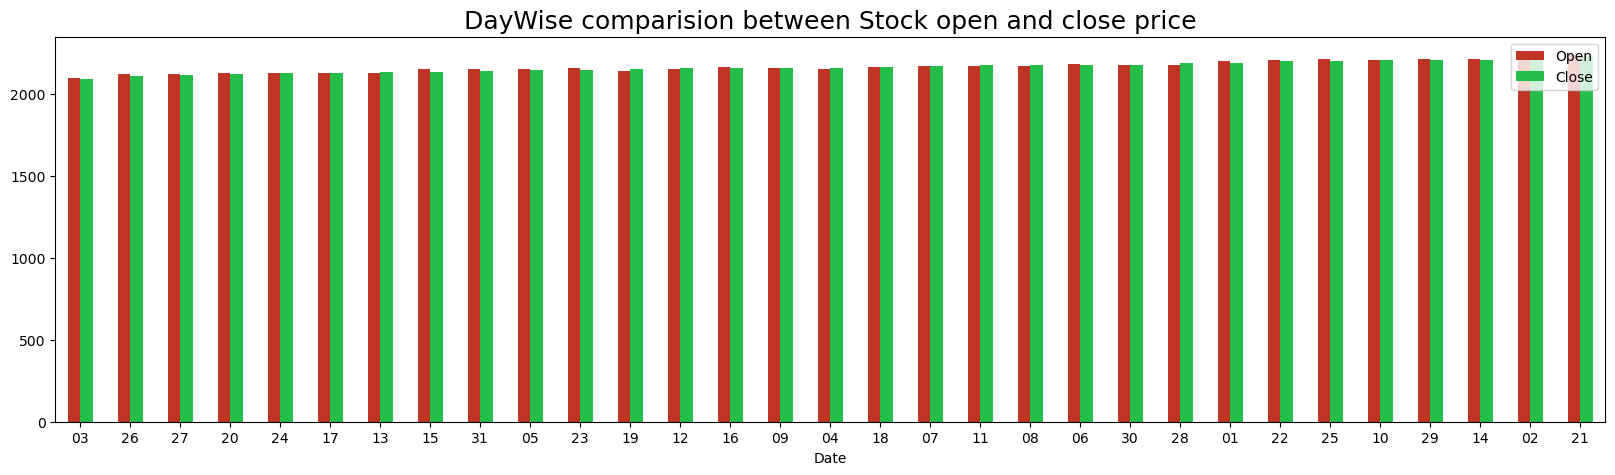

In [16]:
daywise.plot.bar(rot=0, color={"Open": "#BE3525", "Close":"#25BE4B"},figsize=(20,5))
plt.title("DayWise comparision between Stock open and close price", fontsize = 18)

**Creating month-wise data**

In [17]:
monthwise= df.groupby(df['Date'].dt.strftime('%B'))[['Open','Close']].mean().sort_values(by='Close')

In [18]:
monthwise

,Open,Close
Date,,
March,1880.198095,1882.629365
April,1972.230714,1977.127321
February,1989.127164,1990.472985
May,2020.711333,2018.101833
January,2086.644643,2079.411905
July,2150.625385,2147.430000
June,2148.571970,2148.438636
August,2286.054839,2286.484677
December,2330.770896,2324.952239


**Potting month-wise data**

Text(0.5, 1.0, 'Monthwise comparision between Stock open and close price')

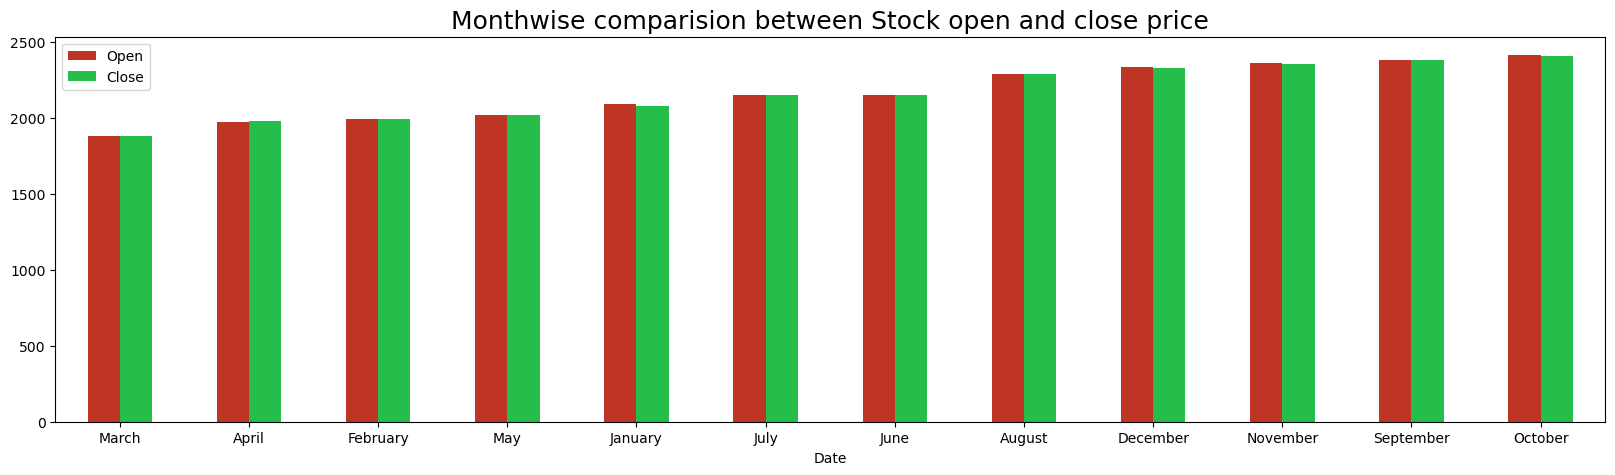

In [19]:
monthwise.plot.bar(rot=0, color={"Open": "#BE3525", "Close":"#25BE4B"},figsize=(20,5))
plt.title("Monthwise comparision between Stock open and close price", fontsize = 18)

In [20]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

**Minimum low price of each month**

In [21]:
df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()

Date
April        1035.39
August       2000.25
December     1855.25
February     1312.56
January      1393.99
July         1708.05
June         1475.95
March         867.43
May          1393.00
November     1835.10
October      1991.00
September    2044.25
Name: Low, dtype: float64

**Maximum low price of each month**

In [22]:
df.groupby(df['Date'].dt.strftime('%B'))['Low'].max()

Date
April        2786.10
August       2655.55
December     2716.00
February     2420.15
January      2548.20
July         2495.00
June         2752.05
March        2628.60
May          2758.05
November     2698.20
October      2708.00
September    2601.00
Name: Low, dtype: float64

**Minimum high price of each month**

In [23]:
df.groupby(df['Date'].dt.strftime('%B'))['High'].min()

Date
April        1114.04
August       2057.00
December     1951.45
February     1344.26
January      1439.60
July         1749.00
June         1538.35
March         941.08
May          1446.85
November     1909.00
October      2042.00
September    2096.95
Name: High, dtype: float64

**Maximum high price of each month**

In [24]:
df.groupby(df['Date'].dt.strftime('%B'))['High'].max()

Date
April        2856.15
August       2676.90
December     2755.00
February     2456.40
January      2606.00
July         2592.00
June         2817.35
March        2688.00
May          2805.50
November     2745.45
October      2751.35
September    2629.70
Name: High, dtype: float64

In [25]:
monthwise['monthwise_high']= df.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthwise['monthwise_low']= df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()

Text(0.5, 1.0, 'Monthwise High and Low stock price')

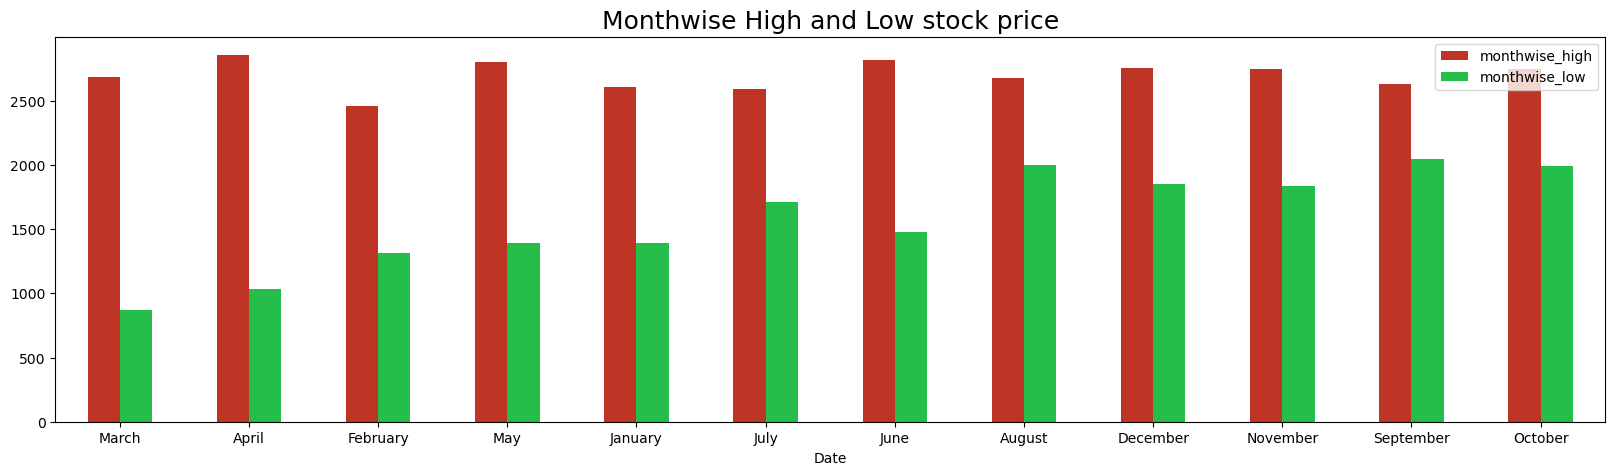

In [26]:
monthwise[['monthwise_high', 'monthwise_low']].plot.bar(rot=0, color={"monthwise_high": "#BE3525", "monthwise_low":"#25BE4B"},figsize=(20,5))
plt.title("Monthwise High and Low stock price", fontsize = 18)

Text(0.5, 1.0, 'Stock analysis chart')

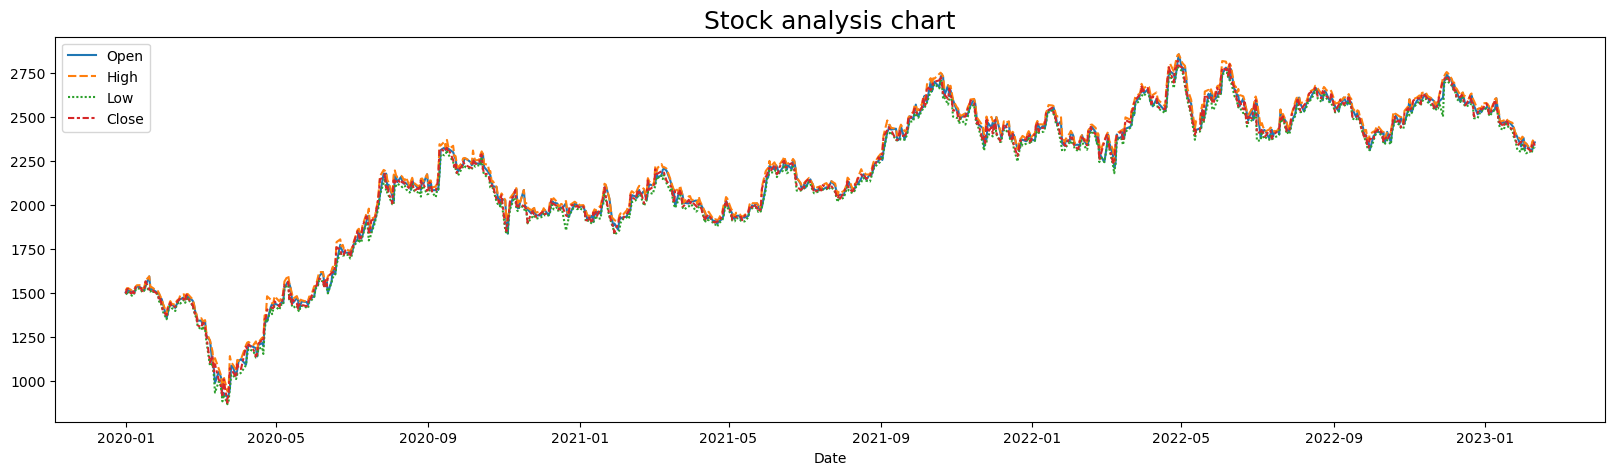

In [27]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[['Open','High','Low','Close']])
plt.title("Stock analysis chart",fontsize=18)

In [28]:
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (776, 2)


Text(0.5, 1.0, 'Stock close price chart')

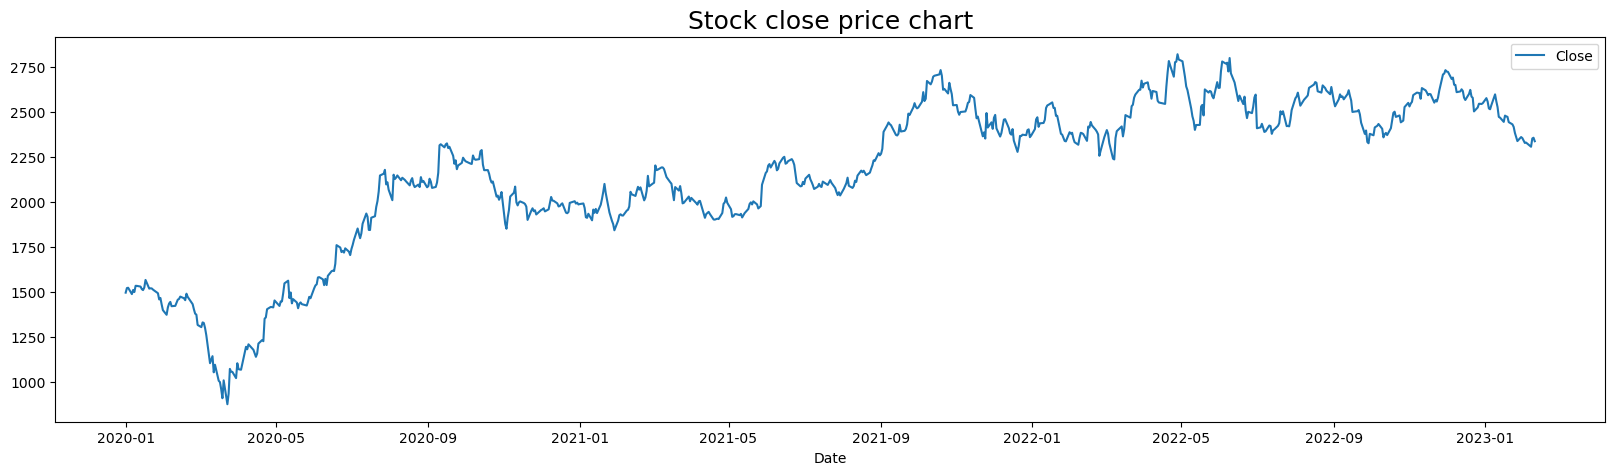

In [29]:
plt.figure(figsize=(20,5))
sns.lineplot(data=closedf)
plt.title("Stock close price chart",fontsize=18)

## **Model Creation**

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

#### **Evaluation Metrics**
**mean_squared_error:**
* This is a metric that measures the average squared difference between the predicted and actual values. It is calculated as the mean of the squared differences between the predicted and actual values. This metric is useful for penalizing large errors in the predictions, and is commonly used as a loss function during training. However, it can be sensitive to outliers and does not provide an easily interpretable measure of error in the original units of the response variable.

**mean_absolute_error:** 
* This is a metric that measures the average absolute difference between the predicted and actual values. It is calculated as the mean of the absolute differences between the predicted and actual values. This metric provides an easily interpretable measure of error in the original units of the response variable, and is less sensitive to outliers than the mean squared error.

**explained_variance_score:** 
* This is a metric that measures the proportion of variance in the target variable that is explained by the model. It is calculated as 1 - (variance of residuals / variance of target variable). This metric provides an indication of how well the model fits the data and can be interpreted as the amount of information captured by the model.

**r2_score:**
* This is a metric that measures the proportion of variance in the target variable that is explained by the model, normalized by the total variance in the target variable. It is calculated as 1 - (sum of squared residuals / total sum of squares). This metric provides a normalized indication of how well the model fits the data, and can be interpreted as the percentage of variance in the target variable that is explained by the model. It ranges from 0 to 1, with 1 indicating a perfect fit and values close to 0 indicating poor performance.

**mean_poisson_deviance:**
* It is a metric that measures the goodness of fit of a Poisson regression model. It compares the predicted values of the model with the observed values and calculates the mean deviation of the predicted values from the observed values. A lower value of this metric indicates a better fit of the model to the data.

**mean_gamma_deviance:**
* It is a metric that measures the goodness of fit of a Gamma regression model. It compares the predicted values of the model with the observed values and calculates the mean deviation of the predicted values from the observed values. A lower value of this metric indicates a better fit of the model to the data.

**accuracy_score:**
* It is a metric used to evaluate the performance of a classification model. It calculates the proportion of correctly predicted labels to the total number of samples. A higher value of this metric indicates a better classification performance of the model.



In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

#### **Scaling**
**MinMaxScaler:**
* MinMaxScaler is a technique used in data preprocessing to scale and transform features or variables of a dataset to a particular range, usually between 0 and 1. This technique helps to normalize the data and make it more consistent, making it easier to compare and analyze the data.
* MinMaxScaler is a simple linear scaling technique that works by subtracting the minimum value of the feature and then dividing by the range (i.e., the difference between the maximum and minimum values) of the feature. The resulting values are then rescaled to fit within the desired range.
* MinMaxScaler is commonly used in machine learning algorithms, especially in algorithms that involve distance calculations or optimization, such as clustering, gradient descent, and neural networks. It helps to improve the performance of the algorithms by reducing the influence of the scale of the variables on the model.

In [32]:
close_stock = closedf.copy()
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(776, 1)


In [33]:
training_size=int(len(closedf)*0.75)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
# print(train_data)
# print(test_data)

train_data:  (582, 1)
test_data:  (194, 1)


In [34]:
# convert an array of values into a dataset matrix
"""
This function creates a sliding window of size time_step over the input dataset and constructs a set of input-output pairs for training a time series forecasting model. 
The input matrix dataX contains n rows, where n is the number of time steps in the input sequence, and time_step columns, representing the past time_step values of the 
input sequence. The output matrix dataY contains n rows and 1 column,representing the next value in the sequence to be predicted.
"""
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [35]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (566, 15)
y_train:  (566,)
X_test:  (178, 15)
y_test (178,)


### **Support Vector Regressor**
* Support Vector Regressor (SVR) is a machine learning algorithm used for regression analysis. It is an extension of the popular Support Vector Machine (SVM) algorithm used for classification problems.

* SVR tries to fit a line or a curve through the data points in such a way that the margin between the predicted values and the actual values is minimized. The algorithm does this by identifying the support vectors, which are the data points closest to the line or curve being fitted, and using them to optimize the margin.

* SVR is particularly useful when dealing with nonlinear data, as it is able to transform the data into a higher dimensional space, where it can be more easily separated. It is also highly effective in dealing with noisy data, as it is able to effectively filter out the noise and identify the underlying trends in the data.

* In summary, SVR is a powerful regression algorithm that is highly effective in dealing with nonlinear and noisy data, making it a valuable tool for data scientists and machine learning practitioners.






In [36]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel= 'rbf', C= 1e2, gamma= 0.1)
svr_rbf.fit(X_train, y_train)

SVR(C=100.0, gamma=0.1)

In [37]:
# Lets Do the prediction 

train_predict =svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

print(train_predict.shape)
print(test_predict.shape)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

(566,)
(178,)
Train data prediction: (566, 1)
Test data prediction: (178, 1)


In [38]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
print(train_predict.shape)
print(test_predict.shape)
# print(train_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 
print(original_ytrain.shape)
print(original_ytest.shape)

(566, 1)
(178, 1)
(566, 1)
(178, 1)


In [39]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  67.66891941287379
Train data MSE:  4579.082654506007
Test data MAE:  52.09004090278658
---------------------------------------------------------------------------------------------------------
Test data RMSE:  57.46963590990109
Test data MSE:  3302.7590516165933
Test data MAE:  46.02904805396382
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9713692553938441
Test data explained variance regression score: 0.720372082376896
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9711959855255884
Test data R2 score: 0.7190445488656896
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.0014490426919978865
Test data M

Text(0.5, 1.0, 'Stock close price chart')

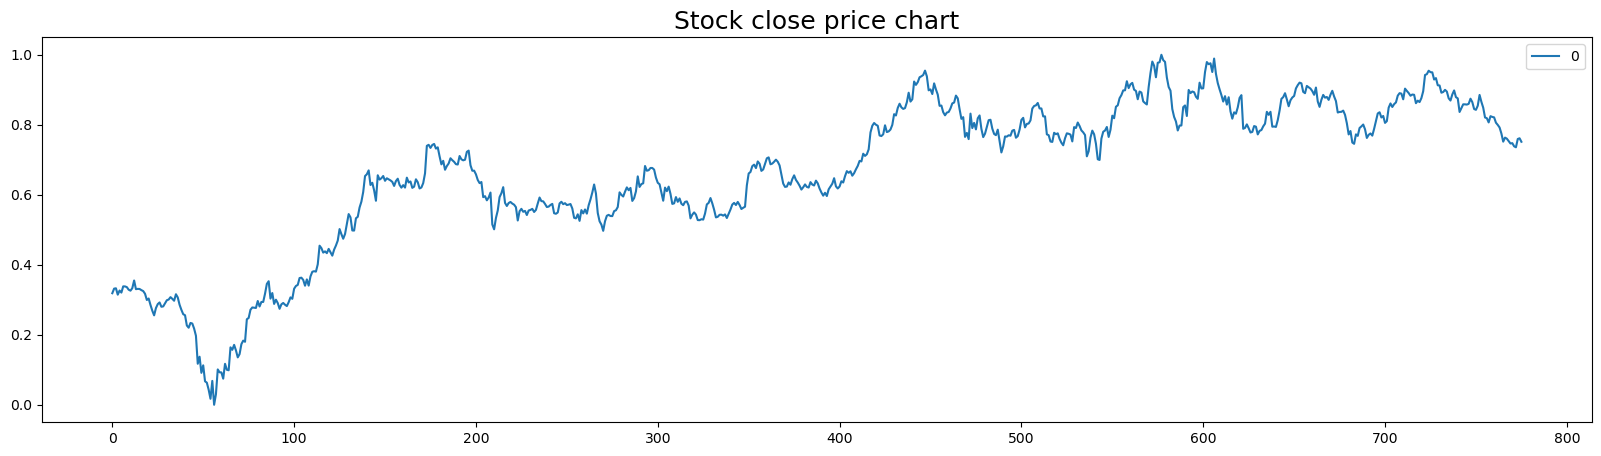

In [40]:
plt.figure(figsize=(20,5))
sns.lineplot(data=closedf)
plt.title("Stock close price chart",fontsize=18)

Train predicted data:  (776, 1)
Test predicted data:  (776, 1)


Text(0.5, 1.0, 'Stock close price chart')

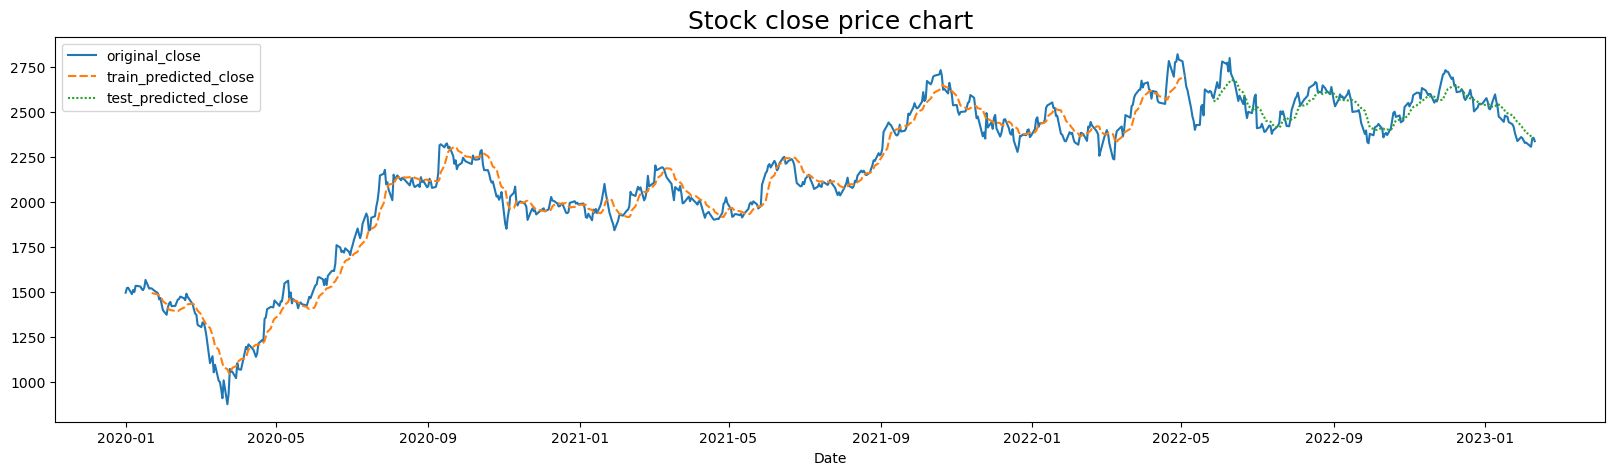

In [41]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Stock close price chart",fontsize=18)

In [42]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8059770587932722,
 0.799624504912299,
 0.7922431973663906,
 0.7750630111619774,
 0.7518131783344479,
 0.7633352193817191,
 0.7603003960701611,
 0.75312483925724,
 0.7464636592767862,
 0.7475181317833446,
 0.7384908183735404,
 0.7356360269533462,
 0.7593230800884729,
 0.7614320251015896,
 0.7514531145517207]

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8059770587932722,
 0.799624504912299,
 0.7922431973663906,
 0.7750630111619774,
 0.7518131783344479,
 0.7633352193817191,
 0.7603003960701611,
 0.75312483925724,
 0.7464636592767862,
 0.7475181317833446,
 0.7384908183735404,
 0.7356360269533462,
 0.7593230800884729,
 0.7614320251015896,
 0.7514531145517207]

In [44]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.7601691545239281, 0.7619451634612825, 0.7645208490228855, 0.7661617578460814, 0.768102486730574, 0.7706839312555503, 0.7735413381768003, 0.7762063645476521, 0.7789801970456648, 0.7815583062980819]


In [45]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

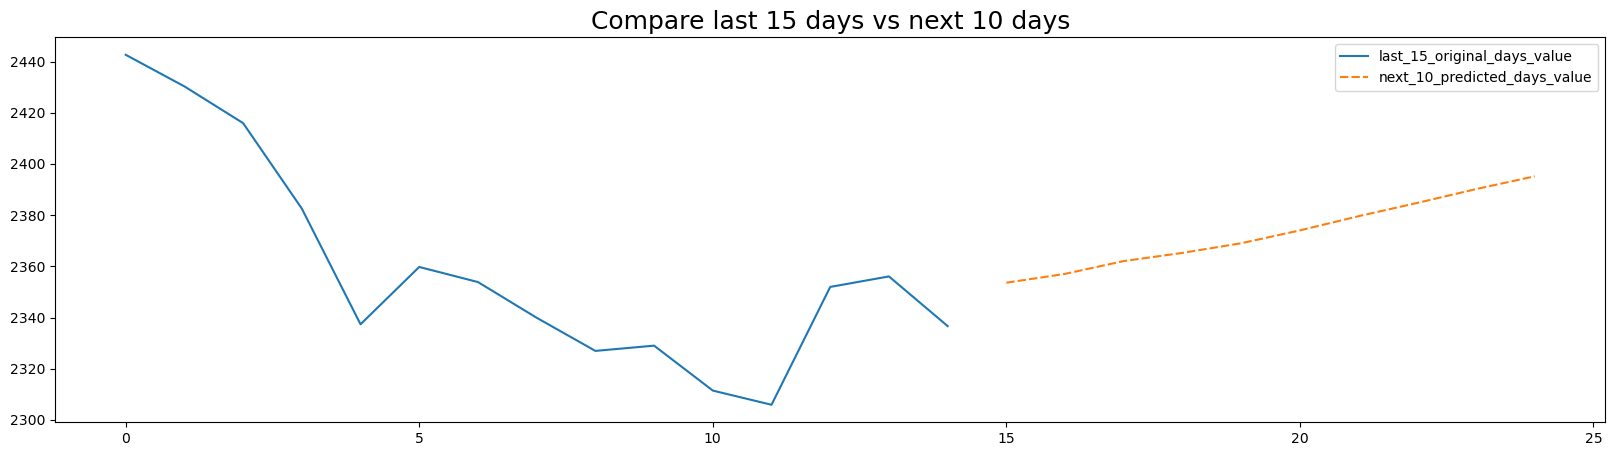

In [46]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})


plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

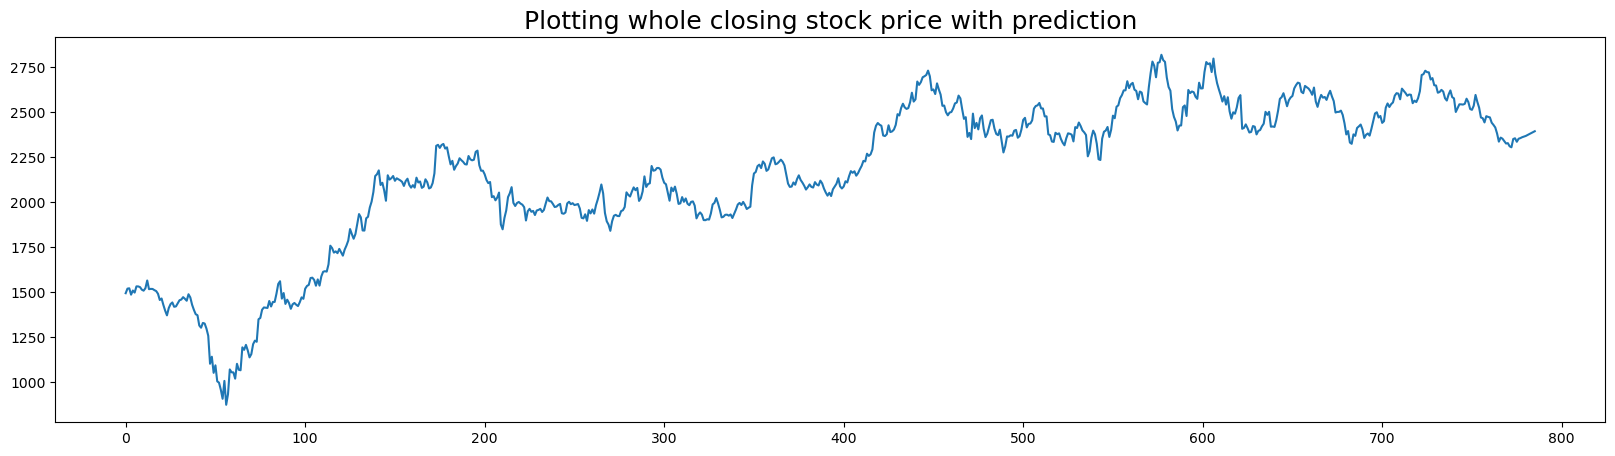

In [47]:
# Creating list of close price
svrdf=closedf.tolist()
# Adding next 10 days prediction
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=svrdf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

### **Random Forest Regressor**
* Random Forest Regressor is a popular machine learning algorithm that is widely used for solving regression problems. This algorithm is based on the concept of decision trees and ensemble learning. The Random Forest Regressor algorithm involves creating a large number of decision trees, and then combining the results of each tree to produce a final prediction.

* In this algorithm, each decision tree is trained on a randomly selected subset of the data, which helps to prevent overfitting. The final prediction is then made by aggregating the predictions of all the decision trees. This technique helps to improve the accuracy and stability of the model by reducing the impact of individual decision trees.

* Random Forest Regressor is highly flexible and can be used to solve a wide range of regression problems. It is also easy to use and implement, making it a popular choice among data scientists and machine learning practitioners. Overall, Random Forest Regressor is a powerful tool for solving complex regression problems, and it can provide highly accurate predictions in a variety of contexts.





In [48]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [49]:
# Lets Do the prediction 

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (566, 1)
Test data prediction: (178, 1)


In [50]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [51]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  15.99200054809697
Train data MSE:  255.74408153033377
Test data MAE:  11.927469434628922
---------------------------------------------------------------------------------------------------------
Test data RMSE:  41.788544641629414
Test data MSE:  1746.2824632654547
Test data MAE:  32.09944662921357
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9983913102072121
Test data explained variance regression score: 0.851628179945364
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9983912812277158
Test data R2 score: 0.8514491763985828
---------------------------------------------------------------------------------------------------------
Train data MGD:  7.857555266943735e-05
Test dat

Train predicted data:  (776, 1)
Test predicted data:  (776, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

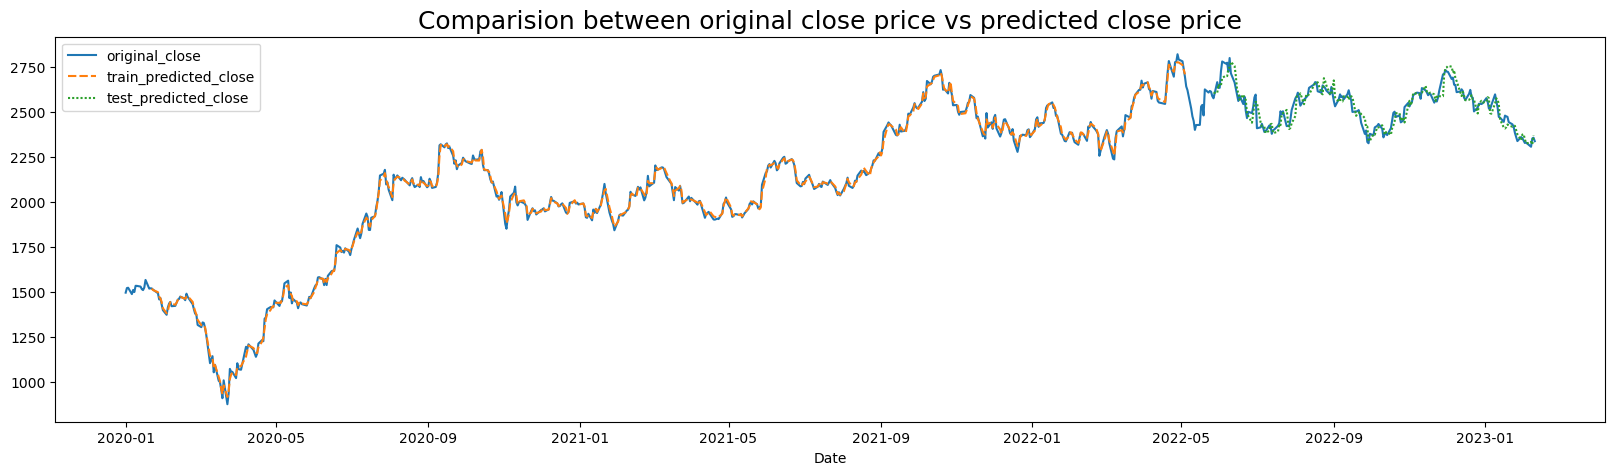

In [52]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [53]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = regressor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.7533753407746515, 0.7636590195977575, 0.7787395195720387, 0.7772843475129884, 0.773870942852734, 0.7752265829947023, 0.7762224165423594, 0.7735839205802172, 0.7678342163468959, 0.7696023867085028]


In [54]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

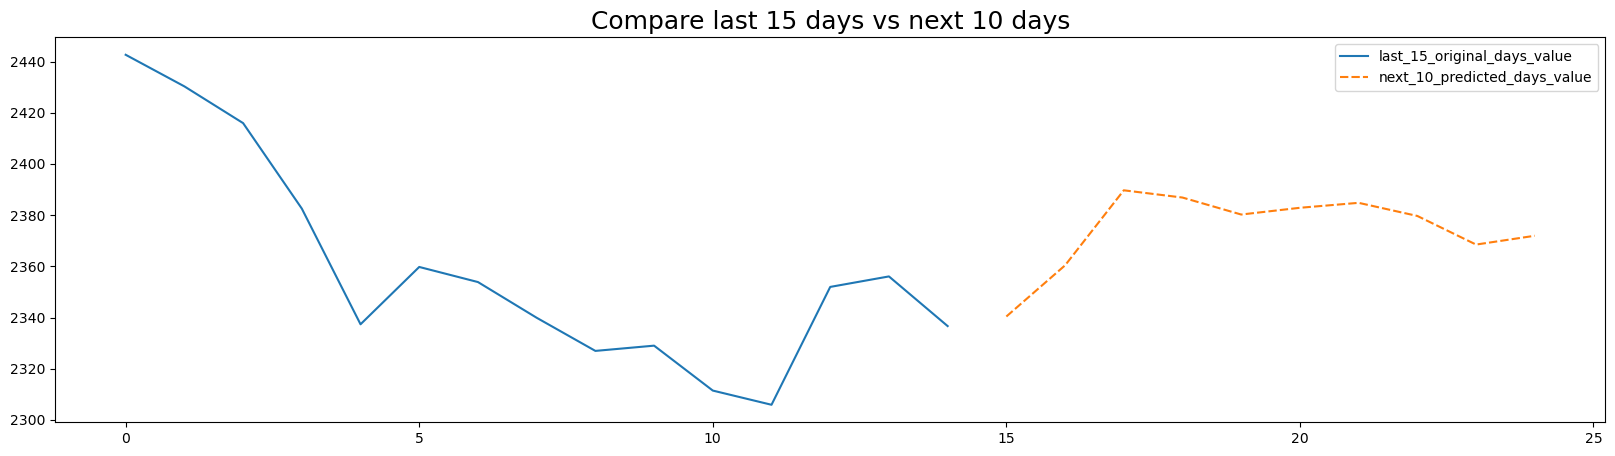

In [55]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

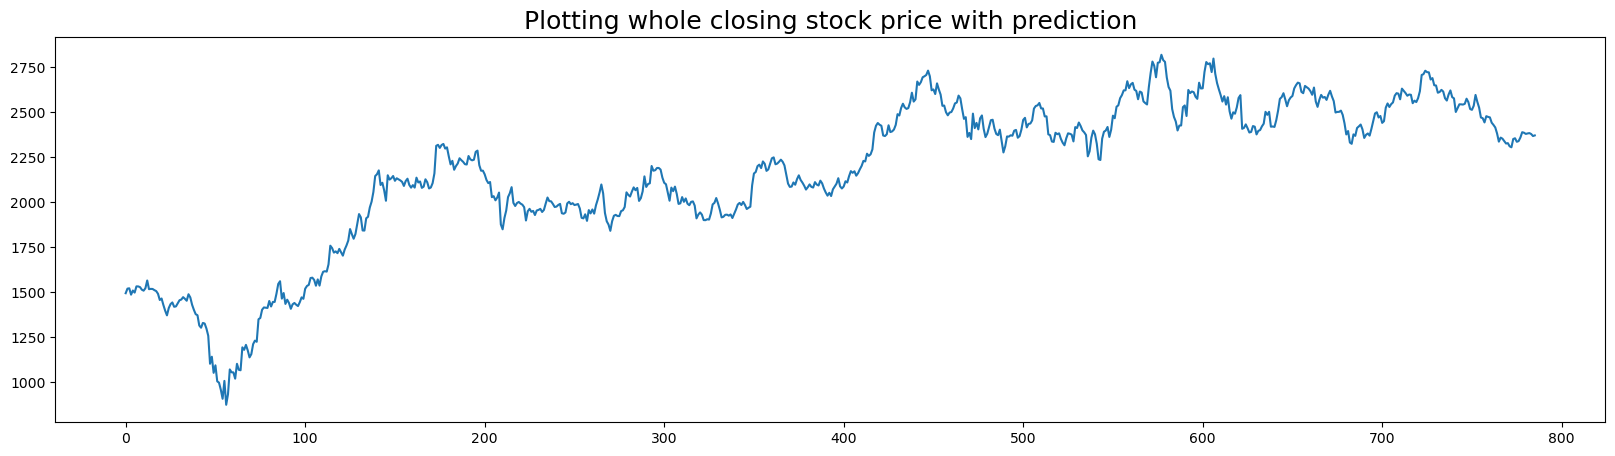

In [56]:
# Creating list of close price
rfdf=closedf.tolist()
# Adding next 10 days prediction
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=rfdf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

### **K Nearest Neighbors (KNN)**
* K Nearest Neighbors (KNN) is a type of non-parametric algorithm used for regression and classification problems. The KNN regression algorithm is called the K Neighbors Regressor.

* In KNN regression, the prediction for a new data point is based on the K-nearest neighbors of that data point in the training dataset. The K neighbors are the K training data points that are closest to the new data point based on some distance metric, such as Euclidean distance. The prediction for the new data point is then computed as the average of the output values of the K nearest neighbors.

* KNN regression can be useful when there is no clear functional relationship between the input and output variables, and the data has complex patterns that are difficult to model with linear regression or other parametric models. However, KNN regression can be sensitive to outliers, and the choice of the value of K can have a significant impact on the accuracy of the predictions.






In [57]:
from sklearn import neighbors
K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [58]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (566, 1)
Test data prediction: (178, 1)


In [59]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [60]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  52.133822907751885
Train data MSE:  2717.935490976835
Test data MAE:  38.995160188457
---------------------------------------------------------------------------------------------------------
Test data RMSE:  48.80047058649307
Test data MSE:  2381.4859294631756
Test data MAE:  38.015955056179806
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.98291102304029
Test data explained variance regression score: 0.8000959519769054
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9829032452284792
Test data R2 score: 0.7974143910513725
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.0008250590166707843
Test data MG

Train predicted data:  (776, 1)
Test predicted data:  (776, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

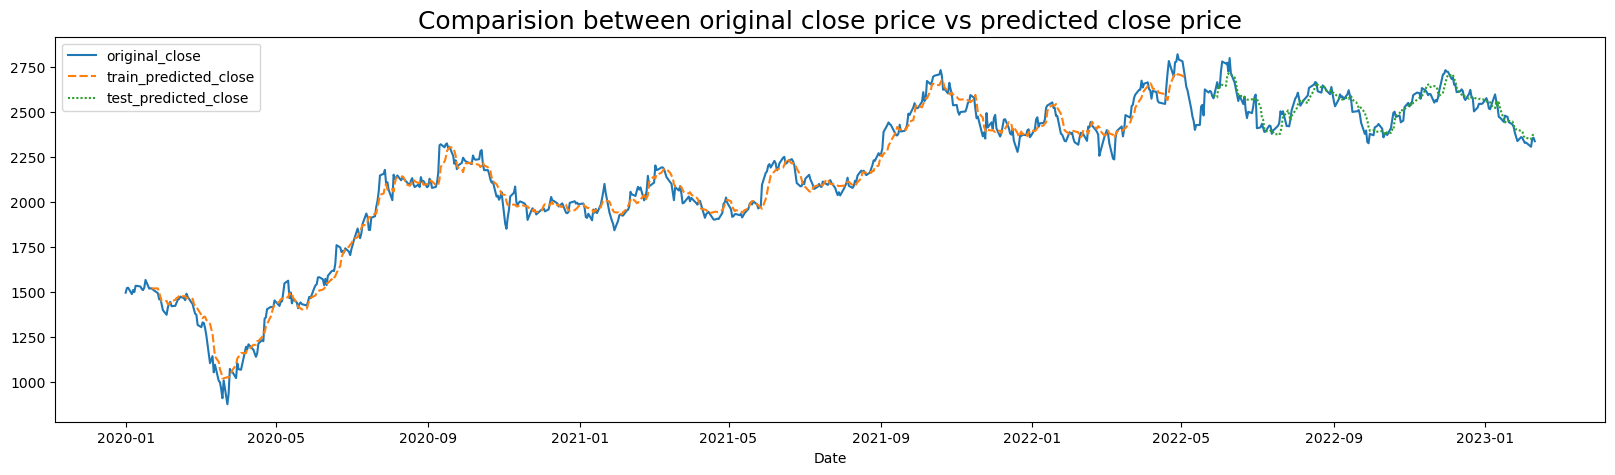

In [61]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [62]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.7802239253810676, 0.7822642868165218, 0.786346724276872, 0.7894329852716768, 0.7843217941463917, 0.7843217941463917, 0.7907292148894948, 0.7947499271299489, 0.7942955609279359, 0.7933491075561958]


In [63]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

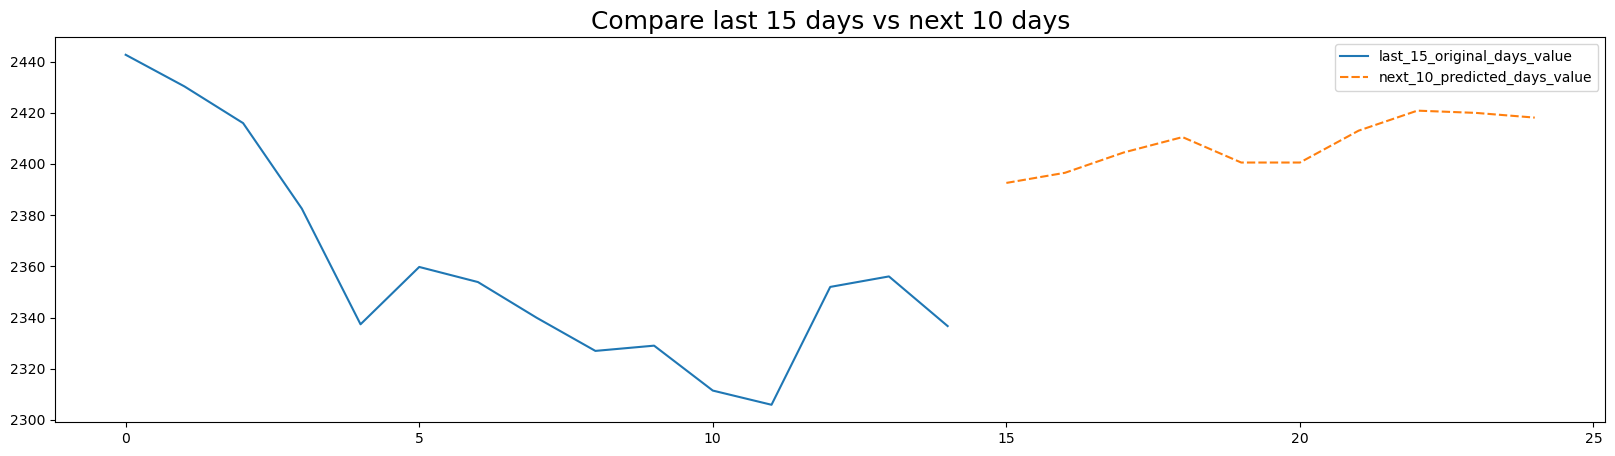

In [64]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

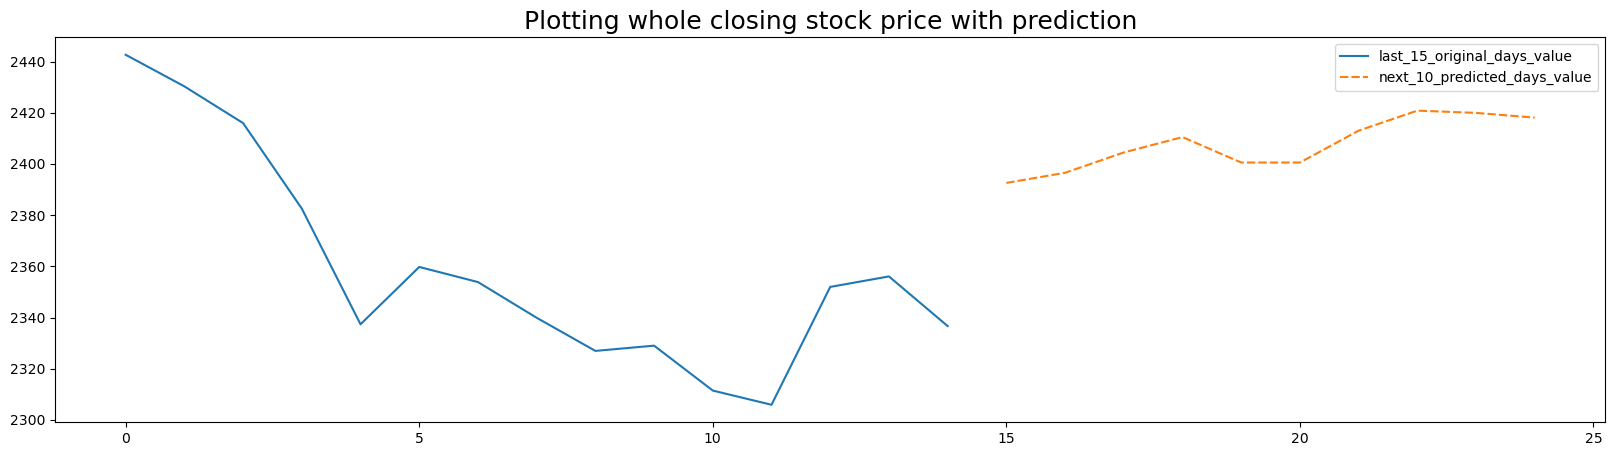

In [65]:
# Creating list of close price
knndf=closedf.tolist()
# Adding next 10 days prediction
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

### **Long short-term memory (LSTM)**

* LSTM (Long Short-Term Memory) is a deep learning model that is commonly used in the field of natural language processing,time series forecasting, speech recognition, and image classification. It is a type of recurrent neural network (RNN) that is designed to address the vanishing gradient problem, which occurs when RNNs are unable to effectively propagate error gradients over time.

* LSTM has the ability to selectively remember or forget previous inputs based on their relevance to the current output, allowing it to maintain long-term dependencies in sequential data. It consists of a memory cell, an input gate, an output gate, and a forget gate, each of which controls the flow of information within the network.

* The LSTM model has proven to be effective in a variety of applications, including language translation, sentiment analysis, and speech recognition. It has also been used in predictive maintenance, financial forecasting, and other areas that involve time-series data.

* Overall, LSTM is a powerful deep learning model that is well-suited for tasks that involve sequential data and long-term dependencies.

In [66]:
# reshape input to be [samples, time steps, features] which is required for LSTM
# LSTM requies 3-dimensional input
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (566, 15, 1)
X_test:  (178, 15, 1)


#### **Sequential Model**

* In deep learning, a sequential model is a type of **neural network architecture** in which the layers are arranged sequentially, or one after the other, **with no branching**. This means that the output of each layer is fed as input to the next layer, in a chain-like sequence.

* The sequential model is a popular choice for many deep learning applications, as it is simple and easy to use. However, it may not be appropriate for all types of problems, such as those that require more complex network architectures with multiple inputs or outputs. In those cases, other types of neural network architectures, such as recurrent neural networks or convolutional neural networks, may be more appropriate.

**1.Input shape:** This parameter defines the shape of the input data that is fed to the LSTM network. In Keras, the input shape is specified as a tuple that contains the number of time steps in the sequence and the number of input features in each time step.

**2.Number of hidden units:** This parameter determines the number of hidden units in the LSTM layer. More hidden units generally allow the network to capture more complex patterns in the input data, but also require more computational resources.

**3.Activation function:** This parameter determines the activation function used in the LSTM layer. The most commonly used activation functions in LSTM are the hyperbolic tangent (tanh) function and the sigmoid function. The activation function is used to control the output of the LSTM cell and can help to prevent vanishing or exploding gradients during training.

**4.Dropout:** This parameter is used to prevent overfitting in the LSTM network by randomly dropping out some of the LSTM units during training.

**5.Recurrent dropout:** This parameter is similar to the dropout parameter, but is used to randomly drop out some of the connections between the LSTM cells during training.

**6.Number of time steps:** This parameter determines the number of time steps in the input sequence. In many applications, the number of time steps is fixed, but it can also be variable.

**7.Batch size:** This parameter determines the number of samples in each training batch. A larger batch size can help to speed up training, but can also require more memory.

**8.Learning rate:** This parameter determines the step size used in the optimization algorithm during training. A smaller learning rate can help to prevent overshooting the optimal solution, but can also make the training process slower.

In [67]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


#### **Epochs**
An epoch is a complete pass through the training data during the training of a model. During each epoch, the model processes every sample in the training dataset, updates its parameters (weights and biases), and tries to minimize the loss function.

In [69]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)

Epoch 1/10
114/114 [==============================] - 11s 36ms/step - loss: 0.0220 - val_loss: 0.0023
Epoch 2/10
114/114 [==============================] - 3s 22ms/step - loss: 0.0032 - val_loss: 0.0043
Epoch 3/10
114/114 [==============================] - 2s 21ms/step - loss: 0.0038 - val_loss: 0.0023
Epoch 4/10
114/114 [==============================] - 3s 23ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 5/10
114/114 [==============================] - 3s 24ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 6/10
114/114 [==============================] - 3s 23ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 7/10
114/114 [==============================] - 2s 21ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 8/10
114/114 [==============================] - 2s 21ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 9/10
114/114 [==============================] - 2s 21ms/step - loss: 0.0026 - val_loss: 0.0030
Epoch 10/10
114/114 [==============================] - 2s 21ms/step - loss: 0.0026 - val_l

In [70]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 [==============================] - 0s 8ms/step


((566, 1), (178, 1))

In [71]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [72]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  89.50680583579349
Train data MSE:  8011.468290926435
Test data MAE:  70.03582349581771
---------------------------------------------------------------------------------------------------------
Test data RMSE:  86.38796834191406
Test data MSE:  7462.881074243545
Test data MAE:  72.64820680082515
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9505679580714104
Test data explained variance regression score: 0.5002983810649584
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9496050921059364
Test data R2 score: 0.36515589354012434
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.00272429489354707
Test data MG

Train predicted data:  (776, 1)
Test predicted data:  (776, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

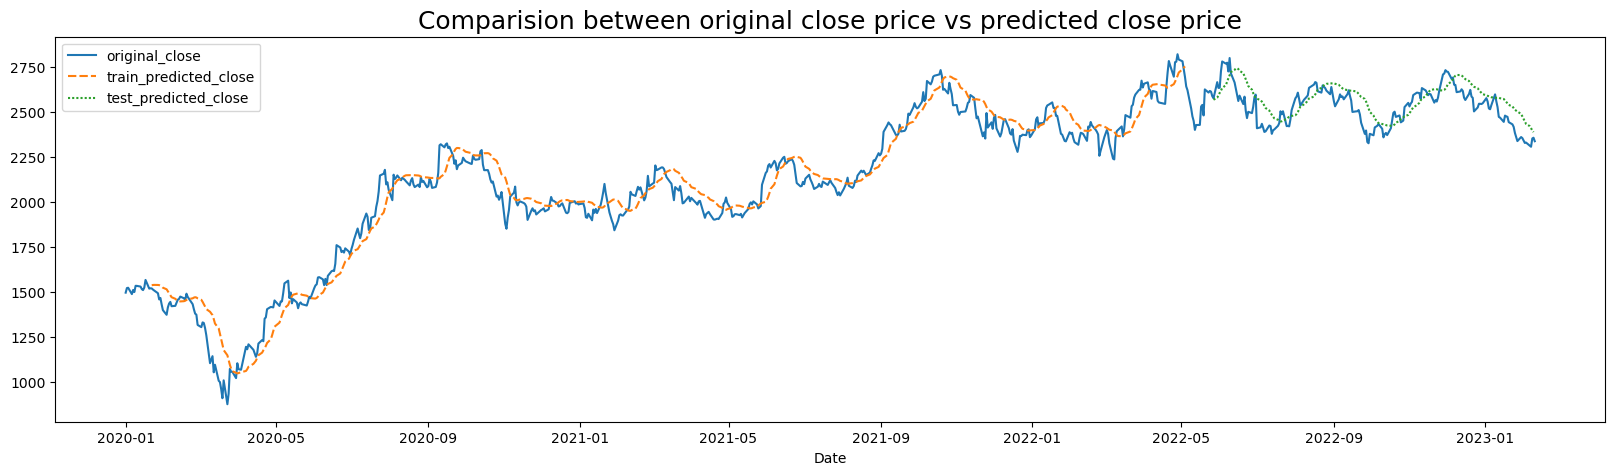

In [73]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [74]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array
lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(np.expand_dims(x_input, 2))
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0])
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = model.predict(np.expand_dims(x_input, 2))
        temp_input.extend(yhat[0])
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

1/1 [==============================] - 0s 26ms/step
Output of predicted next days:  10
Output of predicted next days:  [[0.7715404629707336], [0.7706161141395569], [0.7708866000175476], [0.7720735669136047], [0.7739930748939514], [0.7764462232589722], [0.77890545129776], [0.7814919352531433], [0.784184455871582], [0.7869279384613037]]


In [75]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

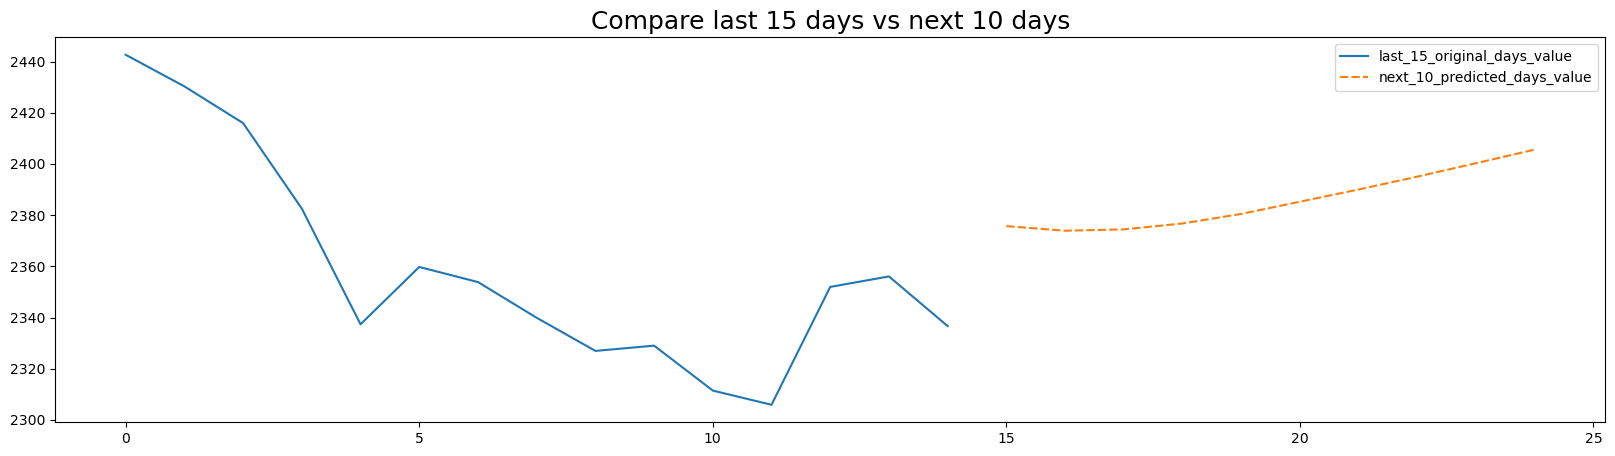

In [76]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

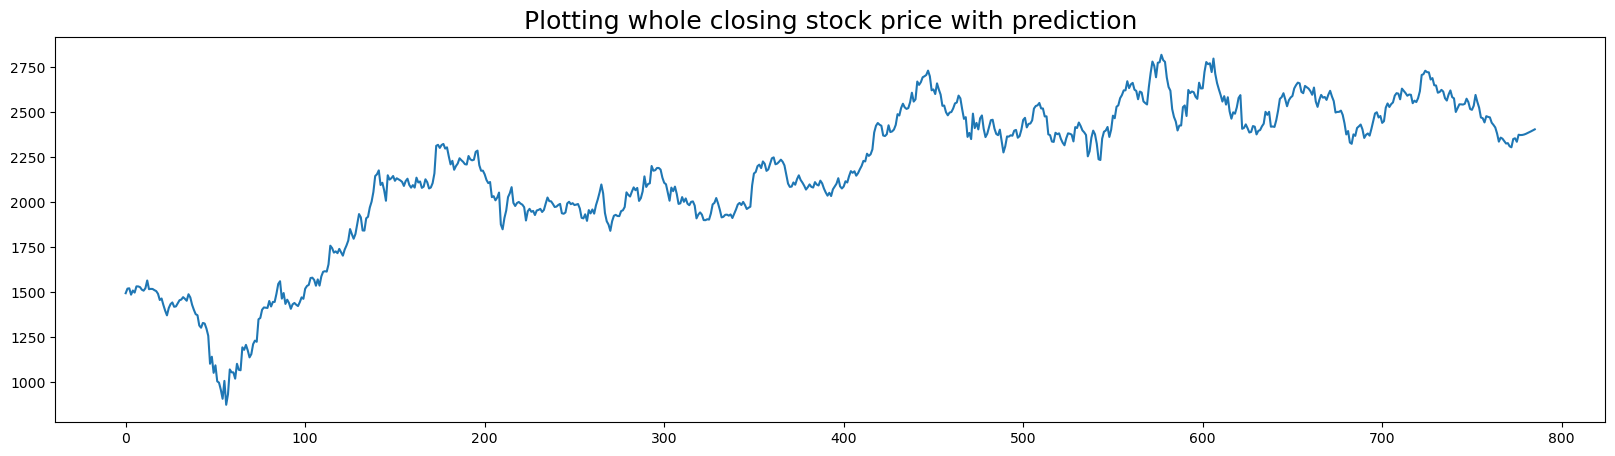

In [77]:
# Creating list of close price
lstmdf=closedf.tolist()
# Adding next 10 days prediction
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=lstmdf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

####**Save and load model**
**Hierarchical Data Format version 5**

*The HDF5 (Hierarchical Data Format version 5),  format is designed to store large and complex datasets, and it provides a way to store and organize data in a hierarchical structure. In the context of deep learning, the .h5 file contains the weights and architecture of the trained model, along with any other relevant information such as the optimizer state and the training configuration.*

In [78]:
model.save('lstm_model.h5')
lstm_model = tf.keras.models.load_model('lstm_model.h5')

In [79]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


### **GRU**
* The GRU (Gated Recurrent Unit) Deep Learning model is a type of artificial neural network that is used for sequence data processing. 
* This model is similar to the LSTM (Long Short-Term Memory) model and is designed to overcome some of the issues associated with LSTM. 
* GRU networks have fewer parameters than LSTM networks, which makes them faster to train and more memory-efficient. 
* The main difference between the two models is that GRU has fewer gates to control the flow of information and therefore, it is less prone to overfitting. 
* The GRU model is widely used in various applications, such as natural language processing, speech recognition, image recognition, and music analysis. 
* It is capable of learning long-term dependencies in the data and can model sequences with arbitrary lengths. In conclusion, the GRU Deep Learning model is a powerful tool for processing sequence data and has proven to be effective in various real-world applications.

In [80]:
# reshape input to be [samples, time steps, features] which is required for LSTM
#  GRU requires 3-Dimensional input
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (566, 15, 1)
X_test:  (178, 15, 1)


In [81]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)

Epoch 1/10
114/114 [==============================] - 17s 61ms/step - loss: 0.0212 - val_loss: 0.0015
Epoch 2/10
114/114 [==============================] - 5s 42ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 3/10
114/114 [==============================] - 5s 41ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 4/10
114/114 [==============================] - 5s 44ms/step - loss: 0.0014 - val_loss: 7.7228e-04
Epoch 5/10
114/114 [==============================] - 4s 39ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 6/10
114/114 [==============================] - 4s 37ms/step - loss: 0.0011 - val_loss: 7.1161e-04
Epoch 7/10
114/114 [==============================] - 5s 41ms/step - loss: 9.7430e-04 - val_loss: 0.0011
Epoch 8/10
114/114 [==============================] - 4s 37ms/step - loss: 9.9824e-04 - val_loss: 0.0012
Epoch 9/10
114/114 [==============================] - 5s 40ms/step - loss: 7.2763e-04 - val_loss: 4.4892e-04
Epoch 10/10
114/114 [==============================] - 4s 36ms/ste

In [84]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 [==============================] - 0s 12ms/step


((566, 1), (178, 1))

In [85]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [86]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  63.79177534126745
Train data MSE:  4069.3906011907384
Test data MAE:  52.66949622487855
---------------------------------------------------------------------------------------------------------
Test data RMSE:  72.65082133684221
Test data MSE:  5278.141840917769
Test data MAE:  63.2537718354986
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9849086787744191
Test data explained variance regression score: 0.8672540371515515
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.97440212491832
Test data R2 score: 0.5510048723233114
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.001086713175979936
Test data MGD:

Train predicted data:  (776, 1)
Test predicted data:  (776, 1)


Text(0.5, 1.0, 'Comparision between original close price vs predicted close price')

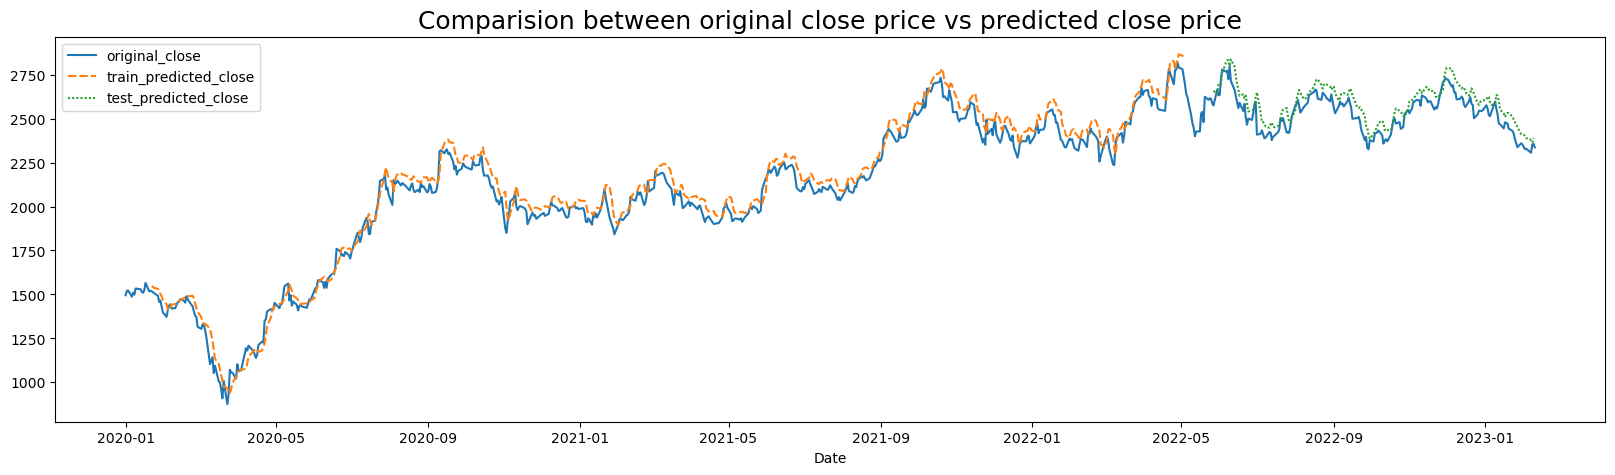

In [87]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Comparision between original close price vs predicted close price",fontsize=18)

In [88]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = model.predict(np.expand_dims(x_input, 2))
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0])
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = model.predict(np.expand_dims(x_input, 2))
        
        temp_input.extend(yhat[0])
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

1/1 [==============================] - 0s 46ms/step
Output of predicted next days:  10
Output of predicted next days:  [[0.7848217487335205], [0.8030403256416321], [0.8247029185295105], [0.8472190499305725], [0.8703495264053345], [0.8939621448516846], [0.9179237484931946], [0.9421002864837646], [0.9663524627685547], [0.9905368685722351]]


In [89]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

Text(0.5, 1.0, 'Compare last 15 days vs next 10 days')

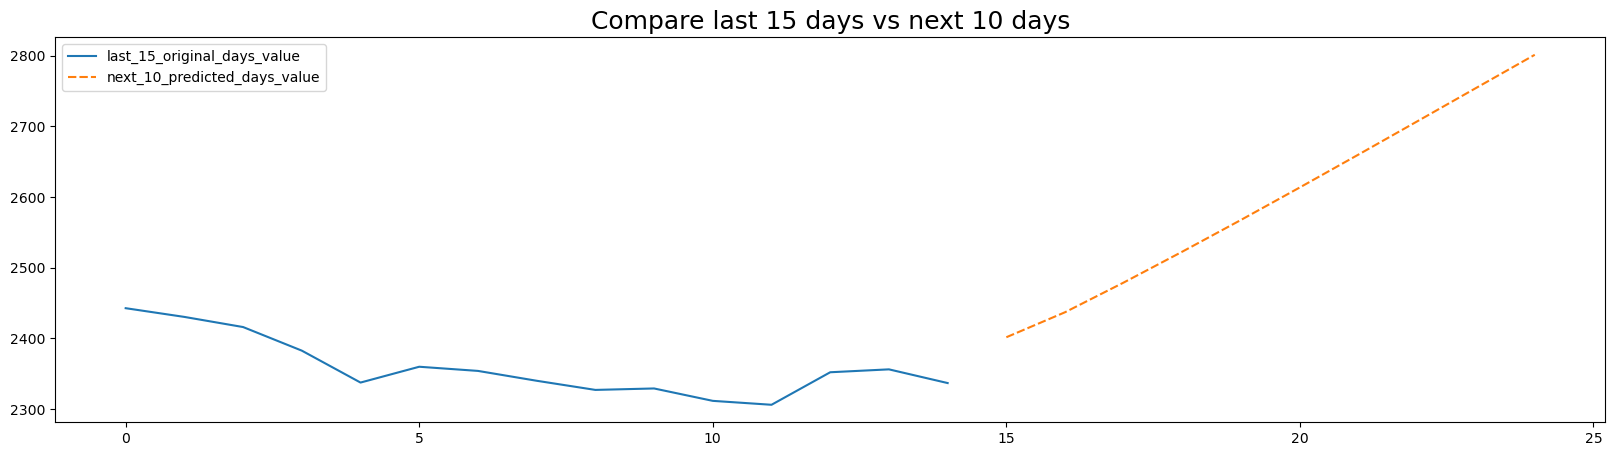

In [90]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})

plt.figure(figsize=(20,5))
sns.lineplot(data=new_pred_plot)
plt.title("Compare last 15 days vs next 10 days",fontsize=18)

Text(0.5, 1.0, 'Plotting whole closing stock price with prediction')

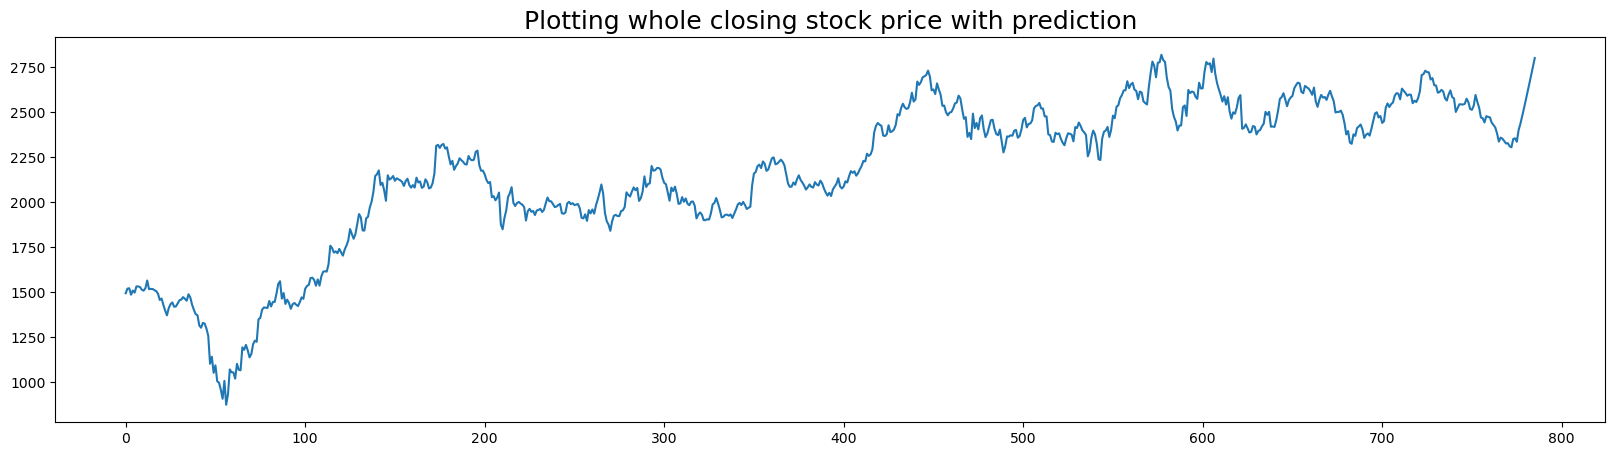

In [91]:
# Creating list of close price
grudf=closedf.tolist()
# Adding next 10 days prediction
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

plt.figure(figsize=(20,5))
sns.lineplot(data=grudf)
plt.title("Plotting whole closing stock price with prediction",fontsize=18)

In [92]:
model.save('gru_model.h5')
gru_model = tf.keras.models.load_model('gru_model.h5')

In [93]:
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


## **Yahoo finance github link and syntax:**
* https://github.com/ranaroussi/yfinance

```
import yfinance as yf

adanient = yf.Ticker("ADANIENT.NS")

# get all stock info (slow)
adanient.info
# fast access to subset of stock info (opportunistic)
# msft.fast_info

# get historical market data
# hist = msft.history(period="1mo")

# show meta information about the history (requires history() to be called first)
# msft.history_metadata

# show actions (dividends, splits, capital gains)
# msft.actions
# msft.dividends
# msft.splits
# msft.capital_gains  # only for mutual funds & etfs

# show share count
# - yearly summary:
# msft.shares
# - accurate time-series count:
# msft.get_shares_full(start="2022-01-01", end=None)

# show financials:
# - income statement
# msft.income_stmt
# msft.quarterly_income_stmt
# - balance sheet
# msft.balance_sheet
# msft.quarterly_balance_sheet
```

# **<center>THE END</center>**